Scalar field as Dark energy : φCDM model 

Import library

In [15]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


Constants 

In [16]:
V0 = 1.0
lambda_ = 0.5 # Steepness of the potential
Mpl = 1.0
Omega_m0 = 0.999  # Initial matter fraction (very close to 1 for matter-dominated)


 Potential and its derivative : you can choose any potential , I choose exponential potential


In [18]:
def V(phi):
    return V0 * np.exp(-lambda_ * phi)

def dV_dphi(phi):
    return -lambda_ * V(phi)


More realistic initial conditions for matter-dominated era

In [19]:
def matter_dominated_a(t, Omega_m):
    """Scale factor in matter-dominated era"""
    return (9 * Omega_m / 4)**(1/3) * (2/3 * np.sqrt(9 * Omega_m / 4) * t)**(2/3)

def matter_dominated_H(t):
    """Hubble parameter in matter-dominated era"""
    return 2/(3*t)


 Set initial time (early universe but not too early to avoid numerical issues)


In [20]:
t_i = 0.1
a_i = matter_dominated_a(t_i, Omega_m0)
H_i = matter_dominated_H(t_i)

Compute initial densities

In [21]:
rho_m_i = 3 * H_i**2 * Mpl**2 * Omega_m0
rho_phi_i = 3 * H_i**2 * Mpl**2 * (1 - Omega_m0)

Initial scalar field conditions (small to match rho_phi_i)

In [22]:
phi_i = 0.0
phidot_i = np.sqrt(2 * max(rho_phi_i - V(phi_i), 1e-10))  # Ensure positive

ODE system

In [23]:
def system_with_matter(t, y):
    phi, phidot, a = y
    rho_phi = 0.5 * phidot**2 + V(phi)
    rho_m = rho_m_i * (a_i / a)**3
    H = np.sqrt((rho_phi + rho_m) / (3 * Mpl**2))
    dphi_dt = phidot
    dphidot_dt = -3 * H * phidot - dV_dphi(phi)
    da_dt = a * H
    return [dphi_dt, dphidot_dt, da_dt]

Time range (start slightly after t_i for stability)

In [24]:
t_span = (t_i*1.01, 1000)
t_eval = np.logspace(np.log10(t_span[0]), np.log10(t_span[1]), 20000)


Solve system

In [25]:
sol = solve_ivp(system_with_matter, t_span, [phi_i, phidot_i, a_i], 
                t_eval=t_eval, rtol=1e-8, atol=1e-8, method='BDF')
t = sol.t
phi, phidot, a = sol.y

Compute derived quantities

In [26]:
rho_phi = 0.5 * phidot**2 + V(phi)
p_phi = 0.5 * phidot**2 - V(phi)
rho_m = rho_m_i * (a_i / a)**3
H = np.sqrt((rho_phi + rho_m) / (3 * Mpl**2))
dH_dt = np.gradient(H, t)
q = -dH_dt / H**2 - 1  # Deceleration parameter
w = p_phi / rho_phi  # Equation of state parameter


Fractional density parameters

In [27]:
rho_total = rho_m + rho_phi
Omega_m = rho_m / rho_total
Omega_phi = rho_phi / rho_total

Equation of state


In [28]:
w_phi =(0.5 * phidot**2 - V(phi)) / (0.5 * phidot**2 + V(phi))
w_phi =np.nan_to_num(w_phi, nan=-1.0)

Plotting

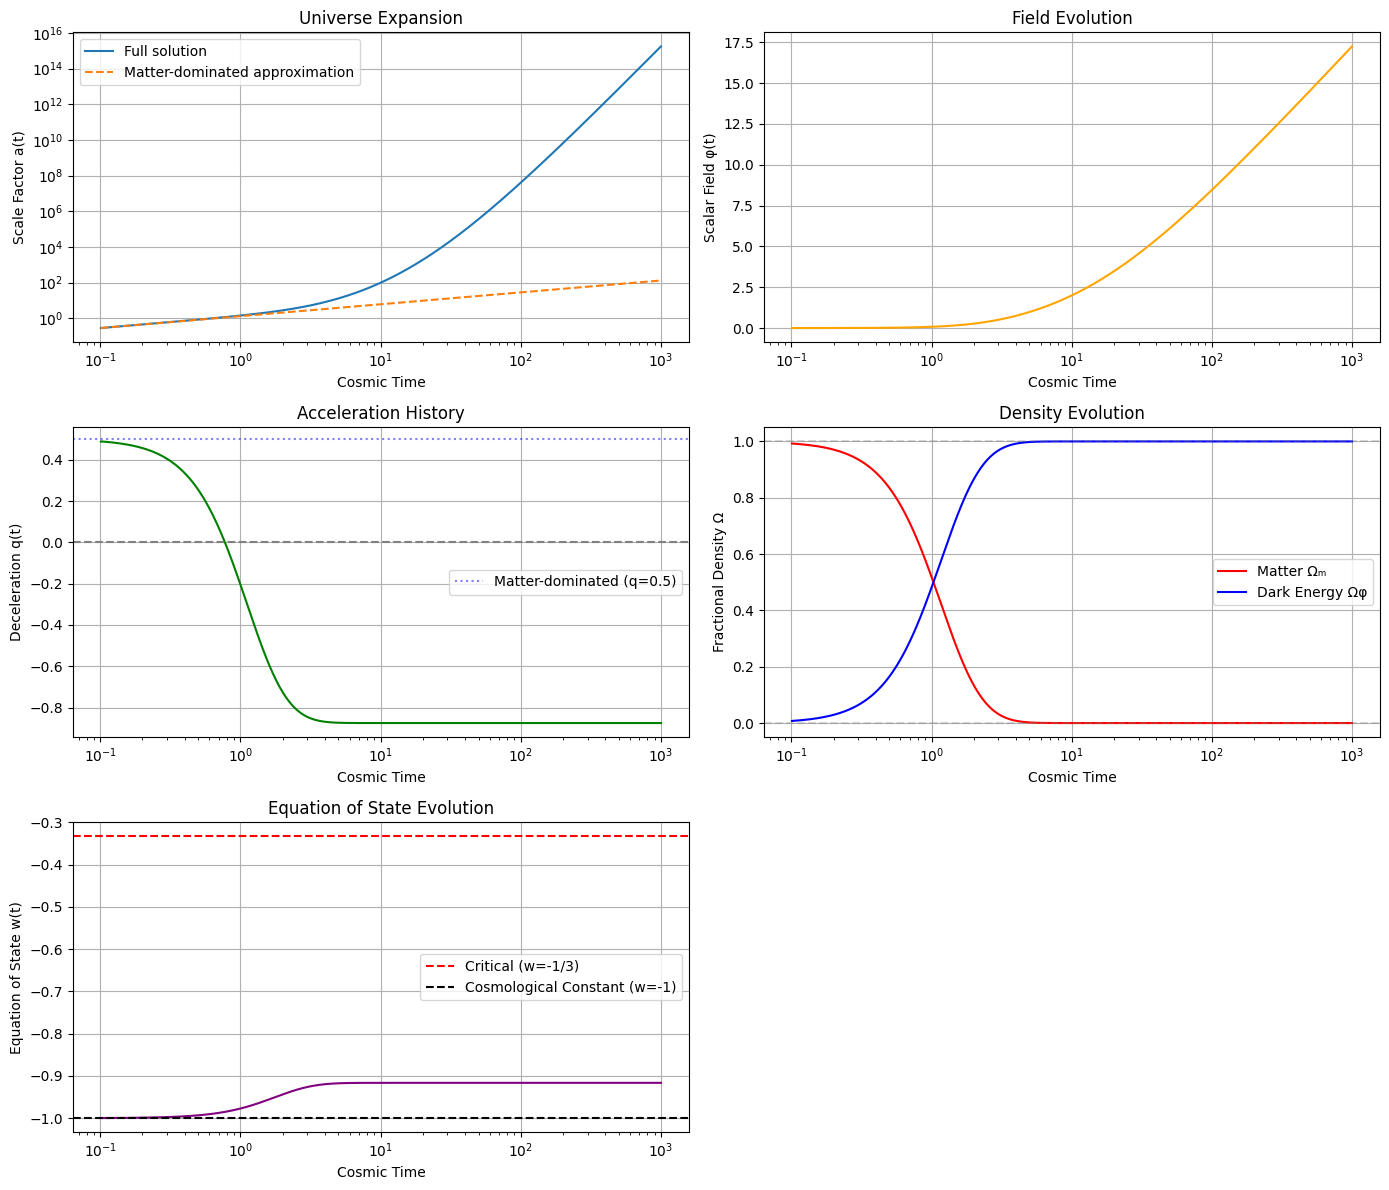

In [30]:
plt.figure(figsize=(14, 12))

# Plot 1: Scale Factor (log-log)
plt.subplot(3, 2, 1)
plt.loglog(t, a, label='Full solution')
plt.loglog(t, matter_dominated_a(t, Omega_m0), '--', label='Matter-dominated approximation')
plt.xlabel('Cosmic Time')
plt.ylabel('Scale Factor a(t)')
plt.title('Universe Expansion')
plt.legend()
plt.grid(True)

# Plot 2: Scalar Field
plt.subplot(3, 2, 2)
plt.semilogx(t, phi, color='orange')
plt.xlabel('Cosmic Time')
plt.ylabel('Scalar Field φ(t)')
plt.title('Field Evolution')
plt.grid(True)

# Plot 3: Deceleration Parameter
plt.subplot(3, 2, 3)
plt.semilogx(t, q, color='green')
plt.axhline(0, color='gray', linestyle='--')
plt.axhline(0.5, color='blue', linestyle=':', alpha=0.5, label='Matter-dominated (q=0.5)')
plt.xlabel('Cosmic Time')
plt.ylabel('Deceleration q(t)')
plt.title('Acceleration History')
plt.legend()
plt.grid(True)

# Plot 4: Density Parameters
plt.subplot(3, 2, 4)
plt.semilogx(t, Omega_m, label='Matter Ωₘ', color='red')
plt.semilogx(t, Omega_phi, label='Dark Energy Ωφ', color='blue')
plt.axhline(1, color='gray', linestyle='--', alpha=0.3)
plt.axhline(0, color='gray', linestyle='--', alpha=0.3)
plt.xlabel('Cosmic Time')
plt.ylabel('Fractional Density Ω')
plt.title('Density Evolution')
plt.legend()
plt.grid(True)

# Plot 5: Equation of State Parameter
plt.subplot(3, 2, 5)
plt.semilogx(t, w_phi , color='purple')
plt.axhline(-1/3, color='red', linestyle='--', label='Critical (w=-1/3)')
plt.axhline(-1, color='black', linestyle='--', label='Cosmological Constant (w=-1)')
plt.xlabel('Cosmic Time')
plt.ylabel('Equation of State w(t)')
plt.title('Equation of State Evolution')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()